In [1]:
%reset -f

In [2]:
import xarray as xr
file='gebco_2022_n15.0_s9.0_w-80.0_e-70.0.nc'
ds=xr.open_dataset(file,decode_cf=False)

In [4]:
elev=ds.elevation.values
lat=ds.lat.values
lon=ds.lon.values

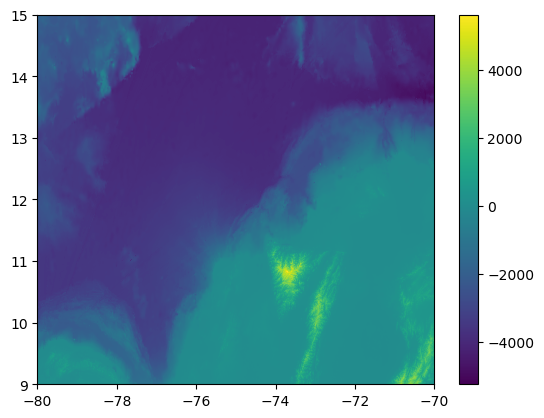

In [5]:
import matplotlib.pyplot as plt
plt.pcolor(lon,lat,elev)
plt.colorbar()

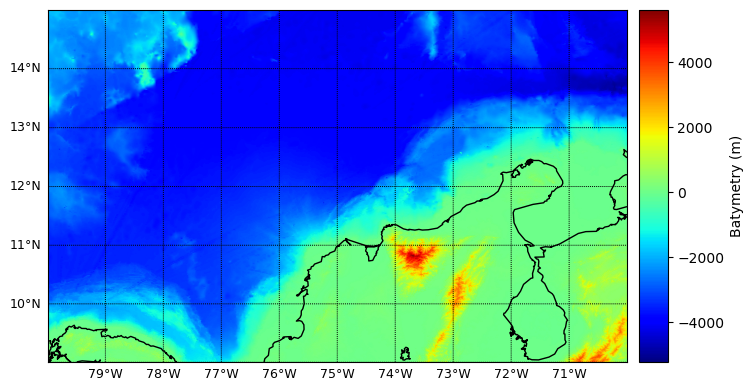

In [8]:
# desde basemap
import numpy as np
from mpl_toolkits.basemap import Basemap

fig, axes=plt.subplots(figsize=(8,8))

m=Basemap(projection='mill',lat_ts=15,llcrnrlon=lon.min(), \
          urcrnrlon=lon.max(),llcrnrlat=lat.min(),urcrnrlat=lat.max(), \
          resolution='i')


m.drawcoastlines()

x,y=m(*np.meshgrid(lon,lat))
m.pcolormesh(x,y,elev,shading='gouraud',cmap=plt.cm.jet)

m.drawparallels(np.arange(9,15,1),labels=[1,0,0,0],linewidth=0.7,fontsize=9)
m.drawmeridians(np.arange(-80,-70,1),labels=[0,0,0,1],linewidth=0.7,fontsize=9)
m.colorbar(label='Batymetry (m)')
plt.show()

